In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [833]:
df = pd.read_csv('HREP/crawled.csv')
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1 Tỷ,39 m²,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,3 WC
1,4 Tỷ,40 m²,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,4 WC
2,13.8 Tỷ,70 m²,Nhà mặt phố,Quận Hà Đông,Đường vào: Rộng 8m,Mặt tiền: 4.5m,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ,3 WC
3,138 Tỷ,230 m²,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN,NaN
4,10.9 Tỷ,57 m²,Nhà mặt phố,Quận Hoàng Mai,NaN,Mặt tiền: 5m,4 tầng,NaN,NaN,NaN


In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          19513 non-null  object
 1   area           20088 non-null  object
 2   type           20088 non-null  object
 3   district       19487 non-null  object
 4   road_width     14026 non-null  object
 5   width          15186 non-null  object
 6   floors         16904 non-null  object
 7   parking_slots  5747 non-null   object
 8   bedrooms       14588 non-null  object
 9   bathrooms      12561 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [835]:
def fix_price(x):
    try:
        x = x.split()
        if x[1] == 'Tỷ':
            return round(float(x[0]), 2)
        elif x[1] == 'Triệu':
            return round(float(x[0]) / 1000, 2)
    except:
        return None

df['price'] = df['price'].apply(fix_price)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39 m²,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,3 WC
1,4.0,40 m²,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,4 WC
2,13.8,70 m²,Nhà mặt phố,Quận Hà Đông,Đường vào: Rộng 8m,Mặt tiền: 4.5m,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ,3 WC
3,138.0,230 m²,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN,NaN
4,10.9,57 m²,Nhà mặt phố,Quận Hoàng Mai,NaN,Mặt tiền: 5m,4 tầng,NaN,NaN,NaN


In [836]:
df['area'] = df['area'].apply(lambda x: float(x.split()[0]))

In [837]:
def fix_width(x):
    try:
        return float(x.split()[-1][:-1])
    except:
        return None
            
df['road_width'] = df['road_width'].apply(str).apply(fix_width)
df['width'] = df['width'].apply(str).apply(fix_width)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,3 WC
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,4 WC
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ,3 WC
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4 tầng,NaN,NaN,NaN


In [838]:
def fix_floors(x):
    try:
        try:
            return int(x.split()[0])
        except:
            return int(float(x.split()[0]) + 0.5)
    except:
        return None
    
df['floors'] = df['floors'].apply(fix_floors)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,NaN,4 Phòng ngủ,3 WC
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,NaN,4 Phòng ngủ,4 WC
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1 Chỗ để ôtô,4 Phòng ngủ,3 WC
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,NaN,NaN,NaN


In [839]:
def fix_parking(x):
    try:
        return int(x.split()[0])
    except:
        return 0
    
df['parking_slots'] = df['parking_slots'].apply(fix_parking)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,0,4 Phòng ngủ,3 WC
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,0,4 Phòng ngủ,4 WC
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4 Phòng ngủ,3 WC
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,0,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,0,NaN,NaN


In [840]:
def fix_rooms(x):
    try:
        return int(x.split()[0])
    except:
        return None

df['bedrooms'] = df['bedrooms'].apply(fix_rooms)
df['bathrooms'] = df['bathrooms'].apply(fix_rooms)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,0,4.0,3.0
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,0,4.0,4.0
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0,3.0
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,0,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,0,NaN,NaN


In [841]:
mean_road_width_by_type = df.groupby('type')['road_width'].transform('mean').round(1)
df['road_width'].fillna(mean_road_width_by_type, inplace=True)

In [842]:
mean_width = df['width'].mean().round(1)
df['width'].fillna(mean_width, inplace=True)

In [843]:
mode_floors = df['floors'].mode()[0]
df['floors'].fillna(mode_floors, inplace=True)

In [844]:
mode_bedrooms_by_floors = df.groupby('floors')['bedrooms'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['bedrooms'].fillna(mode_bedrooms_by_floors, inplace=True)

In [845]:
mode_bathrooms_by_floors = df.groupby('floors')['bathrooms'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['bathrooms'].fillna(mode_bathrooms_by_floors, inplace=True)

In [846]:
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,4.5,6.5,4.0,0,4.0,3.0
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,4.5,6.5,4.0,0,4.0,4.0
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0,3.0
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,16.5,6.5,5.0,0,4.0,4.0
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,16.5,5.0,4.0,0,4.0,3.0


In [847]:
df.isnull().sum()

price            575
area               0
type               0
district         601
road_width         0
width              0
floors             0
parking_slots      0
bedrooms           4
bathrooms          6
dtype: int64

In [848]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,4.5,6.5,4.0,0,4.0,3.0
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,4.5,6.5,4.0,0,4.0,4.0
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0,3.0
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,16.5,6.5,5.0,0,4.0,4.0
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,16.5,5.0,4.0,0,4.0,3.0


In [849]:
df.describe()

,price,area,road_width,width,floors,parking_slots,bedrooms,bathrooms
count,18920.000000,18920.000000,18920.000000,18920.000000,18920.000000,18920.000000,18920.000000,18920.000000
mean,46.608213,71.826358,9.449333,6.444200,4.857082,0.716543,4.533615,4.330127
std,453.053994,107.040363,10.440048,63.873163,1.664426,1.678864,2.186875,2.074311
min,0.000000,3.300000,0.900000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,4.100000,40.000000,4.000000,4.000000,4.000000,0.000000,3.000000,3.000000
50%,7.000000,50.000000,5.000000,5.000000,5.000000,0.000000,4.000000,4.000000
75%,15.500000,72.000000,15.000000,6.500000,5.000000,1.000000,5.000000,4.000000
max,34000.000000,4500.000000,400.000000,7500.000000,75.000000,100.000000,30.000000,40.000000


In [850]:
df = df[(df['price'] >= 0.5) & (df['price'] <= 100)]
df = df[(df['area'] >= 10) & (df['area'] <= 200)]
df = df[(df['road_width'] >= 0.5) & (df['road_width'] <= 40)]
df = df[(df['width'] >= 2) & (df['width'] <= 15)]
df = df[(df['floors'] >= 0) & (df['floors'] <= 10)]
df = df[(df['parking_slots'] >= 0) & (df['parking_slots'] <= 5)]
df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 20)]
df = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 20)]

In [851]:
df.describe()

,price,area,road_width,width,floors,parking_slots,bedrooms,bathrooms
count,17303.000000,17303.000000,17303.000000,17303.000000,17303.000000,17303.000000,17303.000000,17303.000000
mean,11.722717,58.636380,8.299877,5.258989,4.815466,0.649772,4.471306,4.262324
std,13.275706,30.571634,7.397106,1.593878,1.338626,1.249335,2.067656,1.923222
min,0.500000,11.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
25%,4.100000,38.115000,3.500000,4.000000,4.000000,0.000000,3.000000,3.000000
50%,6.700000,50.000000,4.500000,5.000000,5.000000,0.000000,4.000000,4.000000
75%,13.900000,68.000000,11.000000,6.500000,5.000000,1.000000,5.000000,4.000000
max,100.000000,200.000000,40.000000,15.000000,10.000000,5.000000,17.000000,18.000000


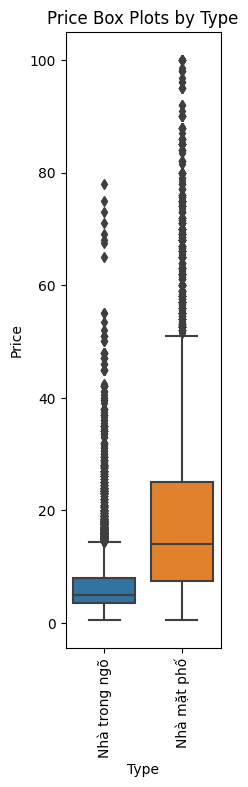

In [852]:
plt.figure(figsize=(2, 8))

sns.boxplot(data=df, x='type', y='price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price Box Plots by Type')
plt.xticks(rotation=90)  
plt.show()

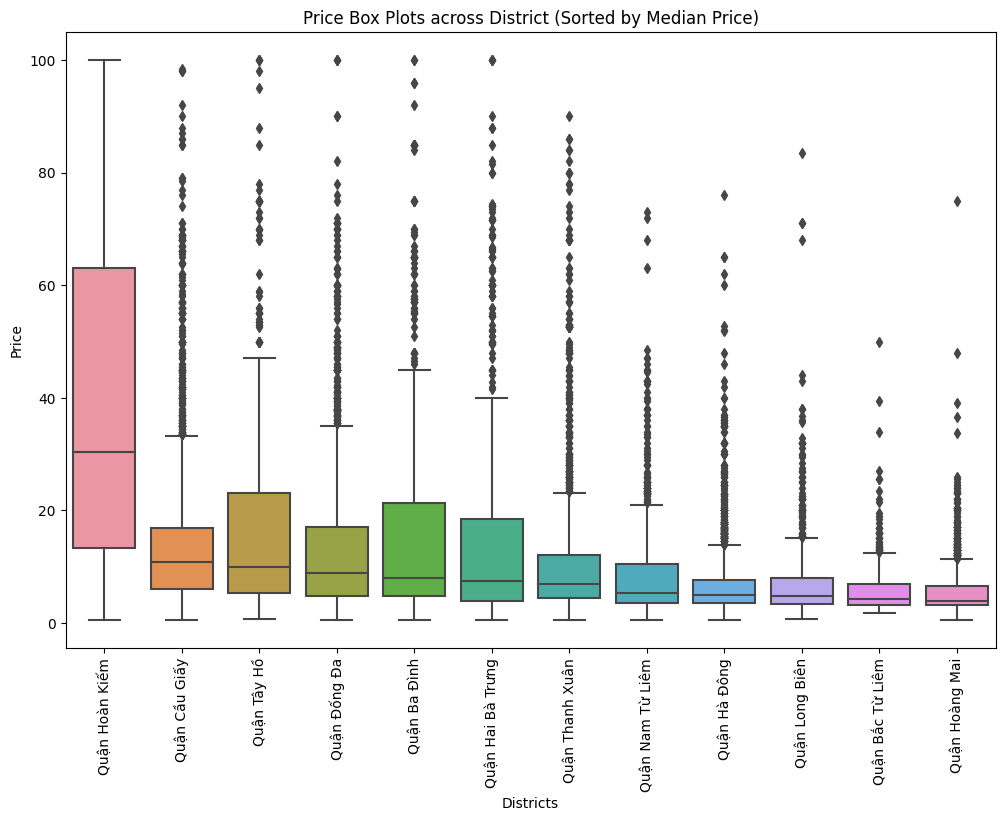

In [853]:
median_prices = df.groupby('district')['price'].median().sort_values(ascending=False)

df['district'] = pd.Categorical(df['district'], categories=median_prices.index, ordered=True)
df_sorted = df.sort_values('district')

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_sorted, x='district', y='price')
plt.xlabel('Districts')
plt.ylabel('Price')
plt.title('Price Box Plots across District (Sorted by Median Price)')
plt.xticks(rotation=90)  
plt.show()

In [854]:
encoding = {
    'Nhà trong ngõ': 0,
    'Nhà mặt phố': 1
}

df['type'] = df['type'].map(encoding)

In [855]:
df = pd.get_dummies(df, columns=['district'], drop_first=True)
df.head()

,price,area,type,road_width,width,floors,parking_slots,bedrooms,bathrooms,district_Quận Cầu Giấy,district_Quận Tây Hồ,district_Quận Đống Đa,district_Quận Ba Đình,district_Quận Hai Bà Trưng,district_Quận Thanh Xuân,district_Quận Nam Từ Liêm,district_Quận Hà Đông,district_Quận Long Biên,district_Quận Bắc Từ Liêm,district_Quận Hoàng Mai
0,4.1,39.0,0,4.5,6.5,4.0,0,4.0,3.0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,40.0,0,4.5,6.5,4.0,0,4.0,4.0,0,1,0,0,0,0,0,0,0,0,0
2,13.8,70.0,1,8.0,4.5,4.0,1,4.0,3.0,0,0,0,0,0,0,0,1,0,0,0
4,10.9,57.0,1,16.5,5.0,4.0,0,4.0,3.0,0,0,0,0,0,0,0,0,0,0,1
5,2.6,28.0,0,2.5,3.2,4.0,0,3.0,3.0,0,0,1,0,0,0,0,0,0,0,0


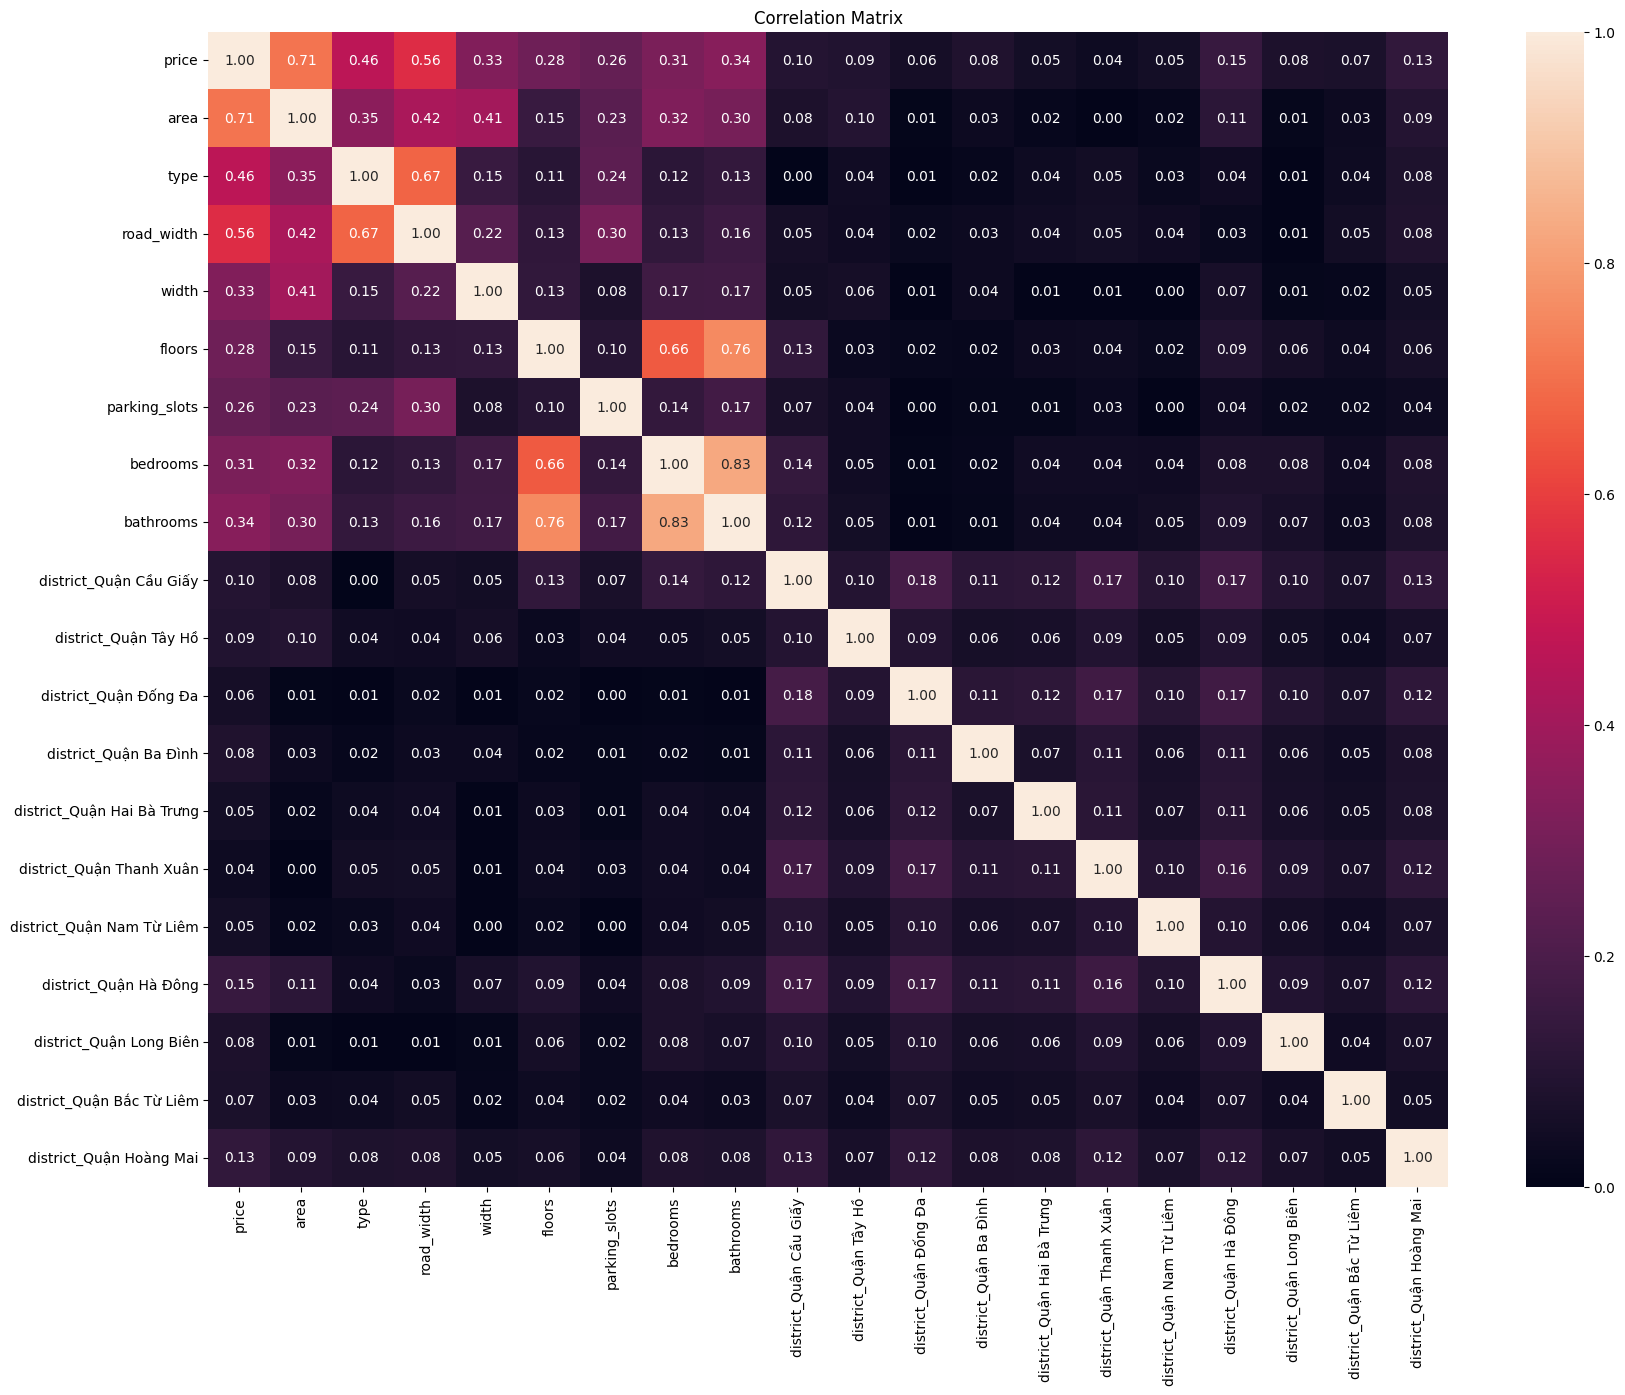

In [856]:
correlation_matrix = abs(df.corr())

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, fmt='.2f', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [857]:
df.drop(columns='bathrooms')

,price,area,type,road_width,width,floors,parking_slots,bedrooms,district_Quận Cầu Giấy,district_Quận Tây Hồ,district_Quận Đống Đa,district_Quận Ba Đình,district_Quận Hai Bà Trưng,district_Quận Thanh Xuân,district_Quận Nam Từ Liêm,district_Quận Hà Đông,district_Quận Long Biên,district_Quận Bắc Từ Liêm,district_Quận Hoàng Mai
0,4.1,39.0,0,4.5,6.5,4.0,0,4.0,0,0,0,0,0,0,0,0,0,0,1
1,4.0,40.0,0,4.5,6.5,4.0,0,4.0,0,1,0,0,0,0,0,0,0,0,0
2,13.8,70.0,1,8.0,4.5,4.0,1,4.0,0,0,0,0,0,0,0,1,0,0,0
4,10.9,57.0,1,16.5,5.0,4.0,0,4.0,0,0,0,0,0,0,0,0,0,0,1
5,2.6,28.0,0,2.5,3.2,4.0,0,3.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18913,46.0,101.0,1,10.0,7.0,1.0,2,2.0,0,1,0,0,0,0,0,0,0,0,0
18914,49.5,135.0,1,30.0,5.6,6.0,4,6.0,1,0,0,0,0,0,0,0,0,0,0
18915,25.0,70.0,1,18.0,10.0,6.0,3,4.0,1,0,0,0,0,0,0,0,0,0,0
18917,9.5,63.0,0,8.0,6.5,5.0,1,4.0,1,0,0,0,0,0,0,0,0,0,0


In [858]:
df.to_csv('dataset.csv', index=False)
